## Titanic Survival Analysis

### Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

To predict: Passengers survived or not

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing data set

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Columns:

- PassengerId: Id of the passenger
- Survived: passenger survived or not
- Pclass: passenger class
- Name: name of the passenger
- Sex: gender of the passenger
- Age: age of the passenger
- SibSp: Siblings or spouse
- Parch: family relation
- Ticket: ticket number
- Fare: ticket fare
- Cabin: cabin number
- Embarked: where the passenger mounted from

### Exploratory Data Analysis (EDA)

In [5]:
#Checking the shape of the data set
df.shape

(891, 12)

We can see there are 891 rows and 12 columns, out of which 11 columns are our features and 1 column is our target variable.

In [6]:
#Checking the data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here, we can see the data types. We have 5 int data, 5 object data and 2 float data.

In [7]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It gives the information about the data set like column count, non-null value count, data type, memory usage, etc.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It gives the statistical information about the data set.

In [9]:
#Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here, we can see there are some null values present in age, cabin and embarked columns. Let's visualize it.

<Axes: >

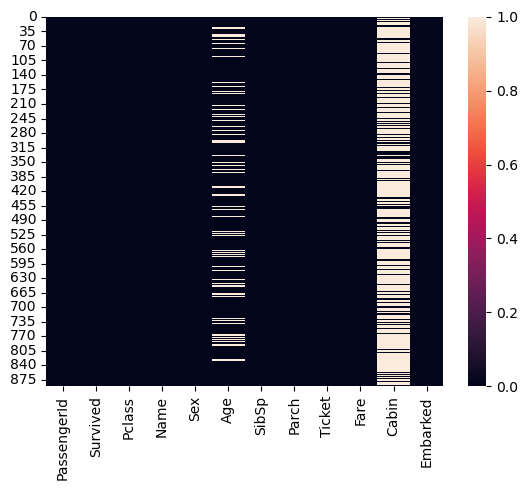

In [10]:
#Visualizing using heatmap
sns.heatmap(df.isnull())

We can see a lot of data is missing. Let's deal with them.

In [11]:
#Let's fill the null values of Age column with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

We have removed the null values from the Age column.

Since there are data which will not be useful later, let's just drop them.

In [12]:
df1 = df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


We have successfully dropped those data. Let's move ahead.

In [13]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Since Embarked has 2 null values and as it is categorical let's just convert it into numerical values.

In [14]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [15]:
#Converting Embarked column data into numerical data
df1['Embarked'] = lab_enc.fit_transform(df1['Embarked'])

#Converting Sex Column data into numerical data
df1['Sex'] = lab_enc.fit_transform(df1['Sex'])

In [16]:
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


We have successfully converted our data. Let's go ahead.

In [17]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

No null values. Great!

### Data Visualization

##### Univariate analysis

0    549
1    342
Name: Survived, dtype: int64


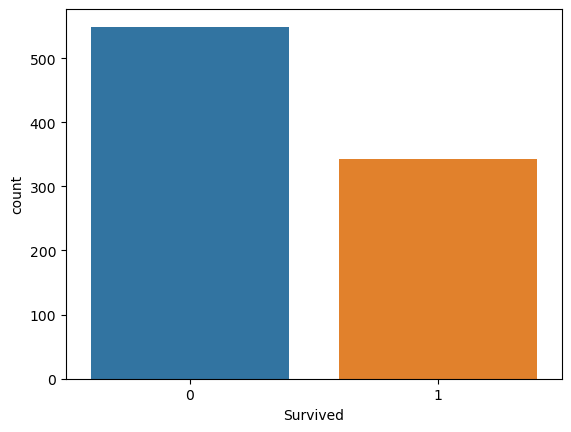

In [18]:
#Visualize the target variable 'survived'
ax = sns.countplot(x='Survived', data=df1)
print(df1['Survived'].value_counts())

Here, 0 represents death count and 1 represents survival count.

3    491
1    216
2    184
Name: Pclass, dtype: int64


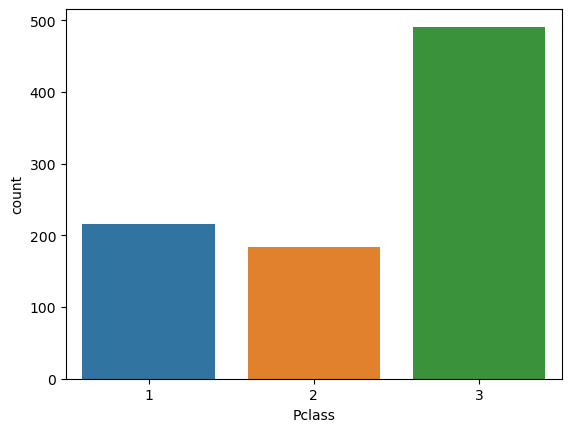

In [20]:
##Visualizing Pclass column
ax = sns.countplot(x='Pclass', data=df1)
print(df1['Pclass'].value_counts())

Here, we can see most of the passengers belonged to the 3rd class than 2nd and 1st class.

1    577
0    314
Name: Sex, dtype: int64


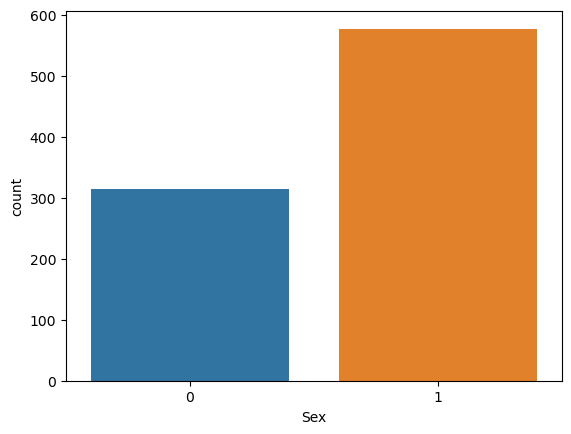

In [21]:
#Visualizing gender column
ax = sns.countplot(x='Sex', data=df1)
print(df1['Sex'].value_counts())

Here, 0 represents male and 1 represents female. As we can see the count of female is more than male.

<Axes: xlabel='Age', ylabel='Density'>

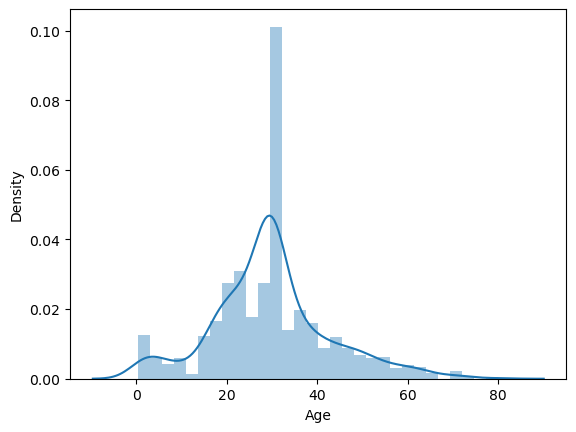

In [25]:
#Visualizing Age column
sns.distplot(df['Age'])     # As it is a numerical column I am using dist plot

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


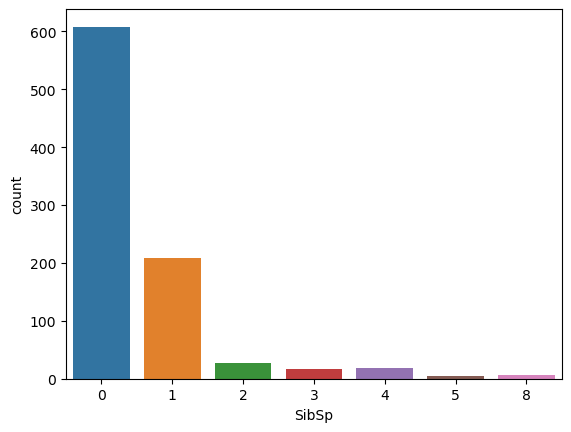

In [26]:
#Visualizing SibSp column
ax = sns.countplot(x='SibSp', data=df1)
print(df1['SibSp'].value_counts())

Here, we can notice that the passengers with no siblings or spouses are higher in number than those having them.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


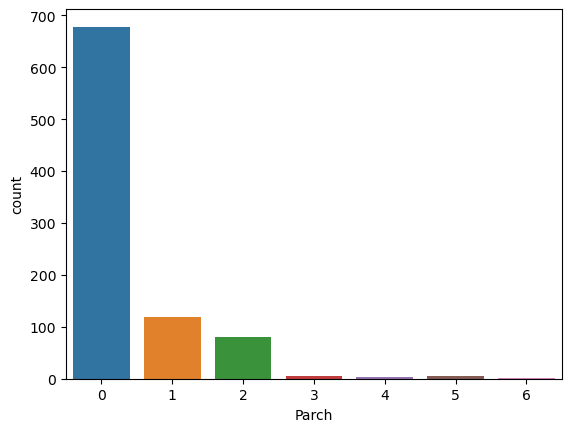

In [27]:
#Visualizing Parch column
ax = sns.countplot(x='Parch', data=df1)
print(df1['Parch'].value_counts())

Here, we can see that the passengers who do not have any relation with others are higher in number than those having some relations with others.

<Axes: xlabel='Fare', ylabel='Density'>

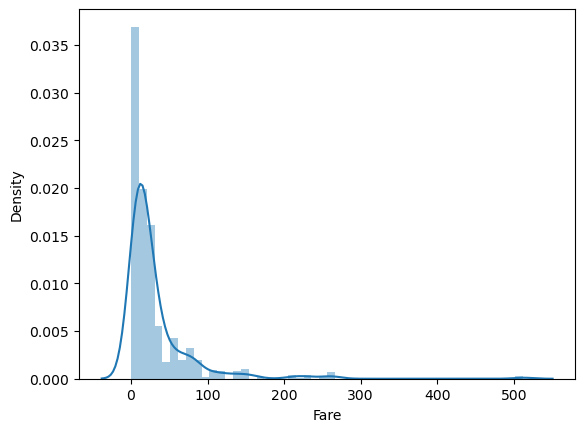

In [79]:
#Visualizing Fare column
sns.distplot(df1['Fare'])

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64


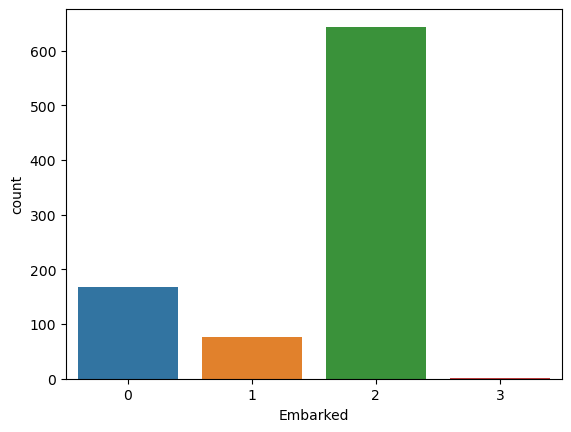

In [30]:
#Visualizing Embarked column
ax = sns.countplot(x='Embarked', data=df1)
print(df1['Embarked'].value_counts())

Here, we can see that most of the passengers had mounted from Southampton.   
#Got the name 'Southampton' by google

##### Bivariate analysis

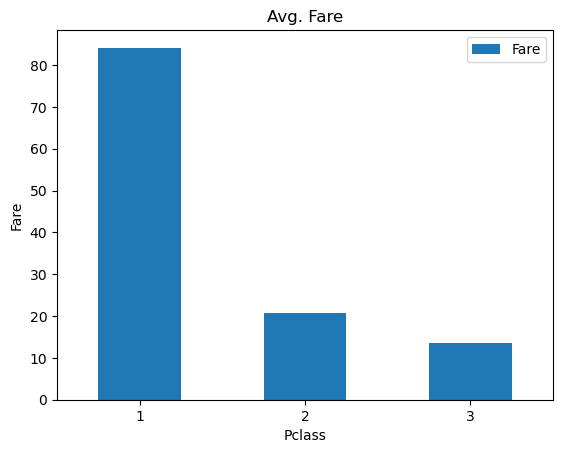

In [33]:
#Let's compare Pclass w.r.t Fare
fare = df.pivot_table(index='Pclass', values='Fare')
fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.xticks(rotation=0)
plt.title('Avg. Fare')
plt.show()

We can see that the passengers of the 1st class have a high average fare as comapred to those of 2nd and 3rd class.

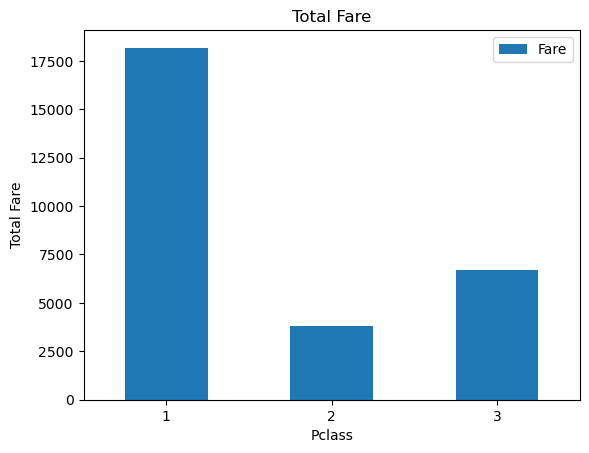

In [34]:
#Let's compare Pclass w.r.t Fare for Total Fare
fare = df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.title('Total Fare')
plt.show()

Here, we can see that the Total Fare of the 1st class passengers was very high as compared to 2nd and 3rd class.

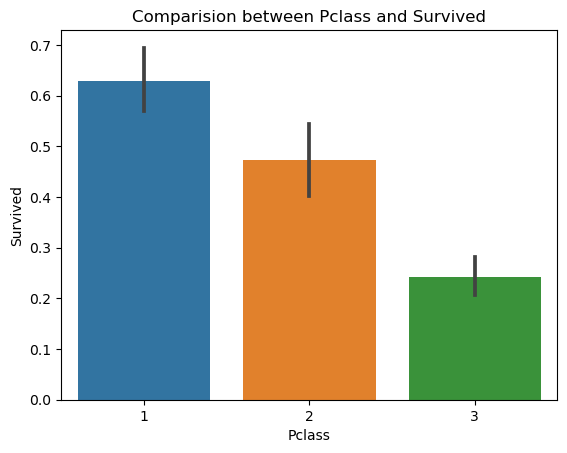

In [38]:
#Comparing Pclass and Survived
plt.title("Comparision between Pclass and Survived")
sns.barplot(x = "Pclass", y = "Survived", data=df1)
plt.show()

We can see that most of the first class passengers survived as compared to second and third class.

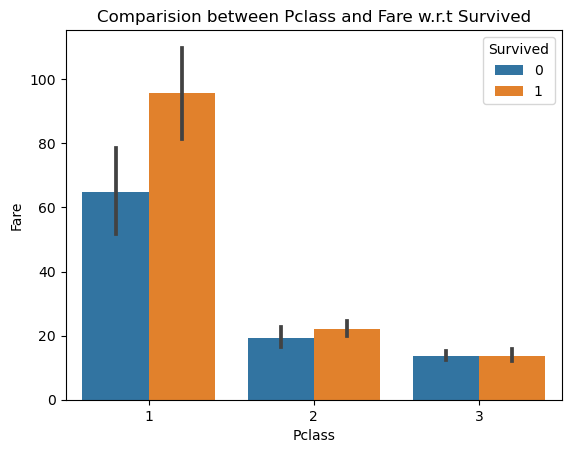

In [43]:
#Comparing Pclass and Fare w.r.t. Survived
plt.title("Comparision between Pclass and Fare w.r.t Survived")
sns.barplot(x = "Pclass", y = "Fare", data=df1, hue='Survived')
plt.show()

Here, we can see that the passengers with high fare and 1st class have mostly survived as compared to others.

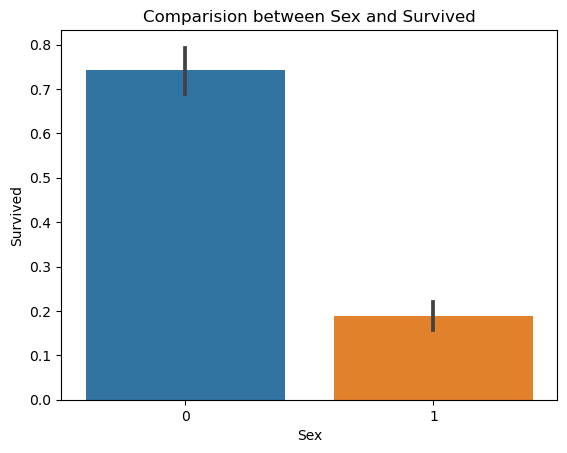

In [40]:
#Comparing Sex and Survived
plt.title("Comparision between Sex and Survived")
sns.barplot(x = "Sex", y = "Survived", data=df1)
plt.show()

Here, we can see that high number of females survived and very less number of males survived.

### Checking for Correlation

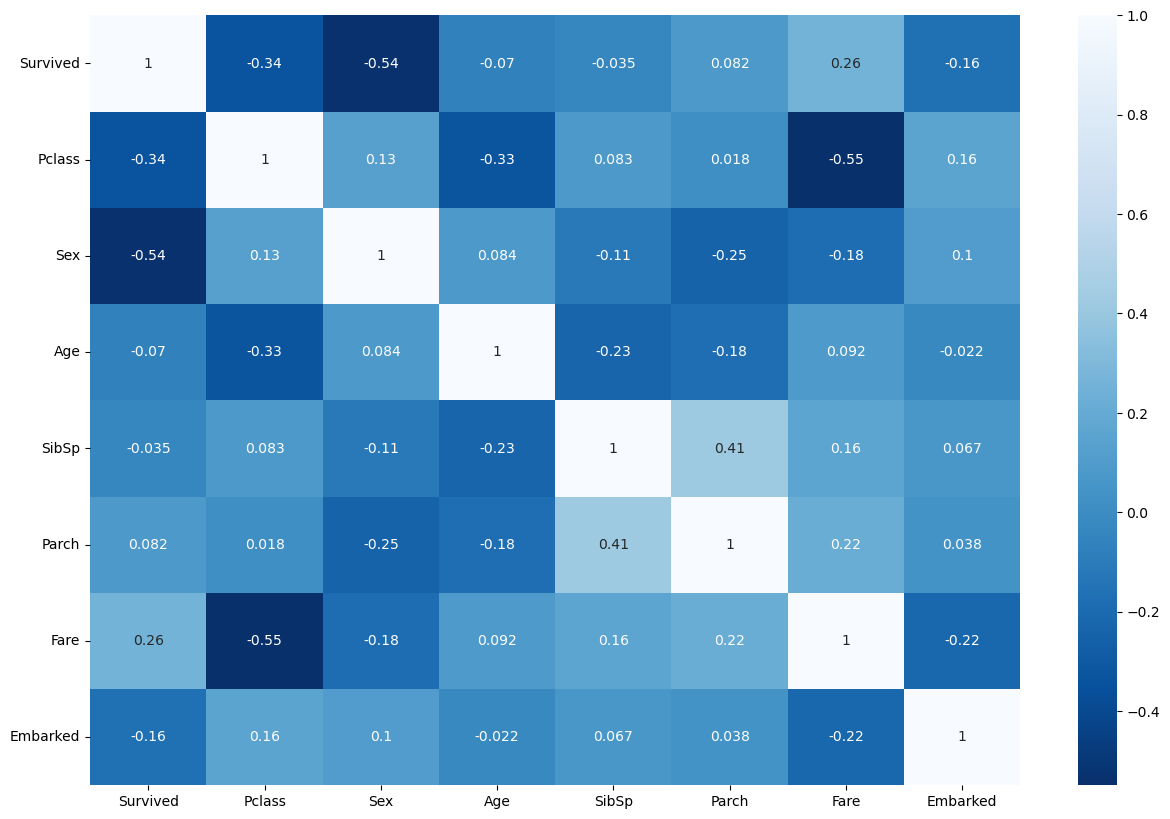

In [46]:
#Plotting heatmap to visulaize the correlation between features and label
plt.figure(figsize = (15, 10))
sns.heatmap(df1.corr(), annot = True, cmap = "Blues_r", linecolor = 'black')
plt.yticks(rotation=0)
plt.show()

Well, till here everything looks good. Let's go ahead.

### Separating Features and Label

In [47]:
x = df1.drop("Survived", axis=1)
y = df1["Survived"]

### Feature scaling using Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.581114
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.938460
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.581114
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.581114
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.581114
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.581114
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.581114
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.938460


We have sucessfully scaled our data to remove any biasness.

### Checking for VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif


,VIF Values,Features
0,1.671456,Pclass
1,1.107995,Sex
2,1.205873,Age
3,1.282209,SibSp
4,1.322179,Parch
5,1.647725,Fare
6,1.076073,Embarked


Everything looks perfect as our VIF value is <10. Great, let's go ahead.

### Data Modelling

In [50]:
from sklearn.model_selection import train_test_split

#### Creating train test split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=345)

As it seems like a classification problem we will use classification algorithms to deal with it.

### Classification Algorithms

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

#### Logistic Regression

In [53]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7847533632286996
[[122  26]
 [ 22  53]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       148
           1       0.67      0.71      0.69        75

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.79       223



#### Random Forest Classifier

In [54]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test, predRF))
print(confusion_matrix(y_test, predRF))
print(classification_report(y_test, predRF))

0.7757847533632287
[[115  33]
 [ 17  58]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       148
           1       0.64      0.77      0.70        75

    accuracy                           0.78       223
   macro avg       0.75      0.78      0.76       223
weighted avg       0.79      0.78      0.78       223



#### Extra Trees Classifier

In [55]:
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7757847533632287
[[114  34]
 [ 16  59]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       148
           1       0.63      0.79      0.70        75

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.76       223
weighted avg       0.80      0.78      0.78       223



#### SVC

In [56]:
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)
print(accuracy_score(y_test, predSV))
print(confusion_matrix(y_test, predSV))
print(classification_report(y_test, predSV))

0.820627802690583
[[127  21]
 [ 19  56]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       148
           1       0.73      0.75      0.74        75

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



#### Gradient Boositng Classifier

In [57]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8295964125560538
[[127  21]
 [ 17  58]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       148
           1       0.73      0.77      0.75        75

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223



#### Ada Boost Classifier

In [58]:
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
predAB = AB.predict(x_test)
print(accuracy_score(y_test, predAB))
print(confusion_matrix(y_test, predAB))
print(classification_report(y_test, predAB))

0.8026905829596412
[[119  29]
 [ 15  60]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       148
           1       0.67      0.80      0.73        75

    accuracy                           0.80       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.82      0.80      0.81       223



#### Bagging Classifier

In [59]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.8161434977578476
[[126  22]
 [ 19  56]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       148
           1       0.72      0.75      0.73        75

    accuracy                           0.82       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



We can see that Gradient Boositing Classifier gives 83% accuracy. 

### Cross Validation Score

In [60]:
#Checking cv score Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.77653631 0.78651685 0.78089888 0.76404494 0.81460674]
0.7845207457158998
Difference between Accuracy score and cross validation score is -  0.00023261751279979315


In [63]:
#Checking cv score Random Forest Classifier
score = cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRF) - score.mean())

[0.7877095  0.81460674 0.87078652 0.7752809  0.8258427 ]
0.8148452702278576
Difference between Accuracy score and cross validation score is -  -0.03906051686462886


In [64]:
#Checking cv score Extra Trees Classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predET) - score.mean())

[0.76536313 0.76404494 0.83707865 0.78651685 0.8258427 ]
0.7957692549118073
Difference between Accuracy score and cross validation score is -  -0.01998450154857856


In [65]:
#Checking cv score Gradient Boosting Classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predGB) - score.mean())

[0.79888268 0.82022472 0.83146067 0.79775281 0.85393258]
0.82045069361622
Difference between Accuracy score and cross validation score is -  0.009145718939833736


In [66]:
#Checking cv score SVC
score = cross_val_score(SV,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predSV) - score.mean())

[0.83240223 0.82022472 0.81460674 0.80337079 0.86516854]
0.827154604230745
Difference between Accuracy score and cross validation score is -  -0.006526801540162053


In [67]:
#Checking cv score Ada Boost Classifier
score = cross_val_score(AB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predAB) - score.mean())

[0.75418994 0.79775281 0.82022472 0.81460674 0.8258427 ]
0.8025233820852427
Difference between Accuracy score and cross validation score is -  0.00016720087439858755


In [68]:
#Checking cv score Bagging Classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predBC) - score.mean())

[0.75977654 0.82022472 0.83707865 0.79213483 0.84269663]
0.8103822735547046
Difference between Accuracy score and cross validation score is -  0.005761224203142956


We can see that our SVC works better with 83% accuracy score and having least difference between accuracy and cross validation scorre.

### Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params = { 'C': [1,5,10,20],
         'gamma': [0.001, 0.01, 0.02, 0.002]}

In [73]:
grid_search = GridSearchCV(SVC(), params)
grid_search.fit(x_train, y_train)

#best params
grid_search.best_params_

{'C': 20, 'gamma': 0.02}

In [74]:
svc = SVC(C=20, gamma=0.02)
svc.fit(x_train, y_train)

SVC(C=20, gamma=0.02)

In [75]:
Final_score = SVC(C=20, gamma=0.02)

Final_score.fit(x_train, y_train)
pred = Final_score.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

82.0627802690583


We got 82% accuracy.